# NAME: CHARULIKA SHARMA

# The Sparks Foundation    #GRIPFEB21    TASK:6

# Task: Prediction using Decision Tree Algorithm (Level- Intermediate)

Work:                                                                                                                            
(i) Creation of the Decision Tree classifier and visualizing it graphically.                                                      
(ii) The purpose is to find if we feed any new data to this classifier, will itbe able to predict the right class accordingly.

Using Dataset : https://bit.ly/3kXTdox

# IMPORTING THE LIBRARIES

In [1]:
import sklearn.datasets as datasets

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

# IMPORTING THE DATA

In [7]:
import pandas as pd
Iris_dataset=pd.read_csv("Iris.csv")
Iris_dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
Iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
Iris_dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# DATA ANALYSIS

In [10]:
Iris_dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null value present. If there were any null values, then we had to remove them.

In [11]:
Iris_dataset.shape

(150, 6)

In [12]:
Iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
Iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
Iris_dataset.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [15]:
Iris_dataset.duplicated().sum()

0

By this command we can check if the data set caintain any duplicate values.So,the value zero, shows that the search got False i.e., the dataset contains no duplicate value.

In [16]:
Iris_dataset.drop('Id',axis=1, inplace=True)

Our dataset contains an additional column i.e., Id, which is of no use in our analysis. hence, we can remove it by using the above mentioned command.

In [17]:
Iris_dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
x=Iris_dataset.drop('Species',axis=1)

In [19]:
y=Iris_dataset['Species']

# DIVIDING THE DATA INTO TRAIN-TEST SPLIT

In [20]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [21]:
data=DecisionTreeClassifier(criterion='entropy')

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
x_train.shape

(120, 4)

In [24]:
y_train.shape

(120,)

In [25]:
tree=data.fit(x_train,y_train)

In [26]:
y_pred=data.predict(x_test)

# CALCULATING PRECISION, recall, f1 score

In [27]:
print(classification_report(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [28]:
accuracy_score(y_pred,y_test)

1.0

In [37]:
compare=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [39]:
compare.head(20)

,Actual,Predicted
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
100,Iris-virginica,Iris-virginica
40,Iris-setosa,Iris-setosa
86,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
71,Iris-versicolor,Iris-versicolor


In [29]:
from sklearn import tree

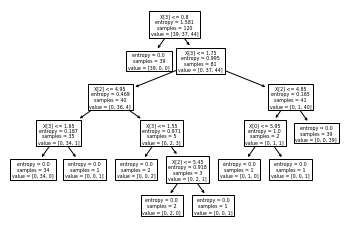

In [30]:
tree.plot_tree(data);

[Text(167.4, 199.32, 'X[3] <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue

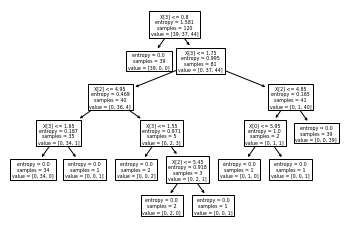

In [31]:
tree.plot_tree(data)

In [32]:
iris=list(Iris_dataset.columns.values)

In [33]:
iris

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

# DATA VISUALISATION

In [34]:
from sklearn import tree
import matplotlib.pyplot as plt

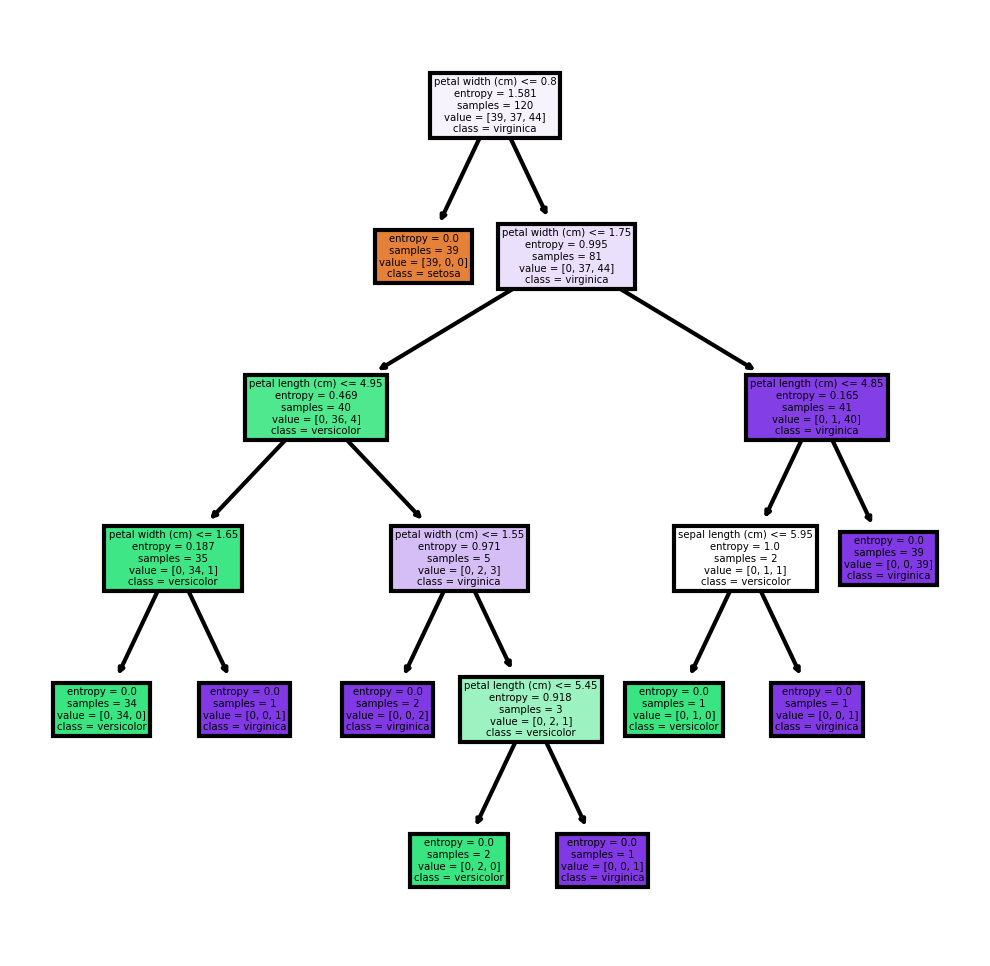

In [35]:
feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
class_names=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(data, feature_names = feature_names, class_names = class_names, filled = True);